## Assignment for  Week 8 - Reinforcement Learning

### Q-Learning

**Objective:**
Reproduce the exercise explained in the following tutorial videos: <br>

* https://www.youtube.com/watch?v=yMk_XtIEzH8&list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7 <br>
* https://www.youtube.com/watch?v=Gq1Azv_B4-4 <br>
* https://www.youtube.com/watch?v=CBTbifYx6a8 <br>

These videos are accompanied by the following:.  
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.1](https://pythonprogramming.net/q-learning-reinforcement-learning-python-tutorial/) <br>
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.2](https://pythonprogramming.net/q-learning-algorithm-reinforcement-learning-python-tutorial/?completed=/q-learning-reinforcement-learning-python-tutorial/) <br>
* [Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.3](https://pythonprogramming.net/q-learning-analysis-reinforcement-learning-python-tutorial/?completed=/q-learning-algorithm-reinforcement-learning-python-tutorial/) <br>

<div class="alert alert-block alert-danger">
<b>Important::</b> In working through the code listed on the webpages, there are a number of errors that prevent the demo from performing correctly.  The code shown in the videos is correct!
</div>

**NOTE:** You don't need to reproduce all of the graphs demostrated in the third video for this assignment. Please include 2 of the demonstrated graphs.

### Deliverables:

Upload your notebook's .ipynb file, a pdf printout and a screenshot of your car reaching it's goal.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
import gym
import pyglet
import numpy as np
import matplotlib.pyplot as plt

    First Video.

In [2]:
env = gym.make("MountainCar-v0")
env.reset()
done = False

print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size




q_table = np.random.uniform(low=-2, high=0, size = (discrete_os_size + [env.action_space.n]))



[0.6  0.07]
[-1.2  -0.07]
3


    Second video.

In [ ]:
env.reset()
done = False

learning_rate = 0.1
discount = 0.95
episodes = 25000

discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))

discrete_state = get_discrete_state(env.reset())


#print(discrete_state)
#print(np.argmax(q_table[discrete_state]))


while not done:
    action = np.argmax(q_table[discrete_state])
    new_state, reward, done, _ = env.step(action)
    new_discrete_state = get_discrete_state(new_state)
    env.render()
    if not done:
        max_feature_q = np.max(q_table[new_discrete_state])
        current_q = q_table[discrete_state + (action,)]
        new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_feature_q)
        q_table[discrete_state+(action, )] = new_q
    elif new_state[0] >= env.goal_position:
        q_table[discrete_state + (action, )] = 0 
        
    discerete_state = new_discrete_state
    
env.close()

In [18]:
env.reset()
done = False

learning_rate = 0.1
discount = 0.95
episodes = 25000

show_every = 2000

discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))


for episode in range(episodes):
    if episode % show_every == 0:
        render = True
        print(episode)
    else:
        render = False
    discrete_state = get_discrete_state(env.reset())
    while not done:
        action = np.argmax(q_table[discrete_state])
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_feature_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_feature_q)
            q_table[discrete_state+(action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print("We made it on episode: ", episode)
            q_table[discrete_state + (action, )] = 0 

        discerete_state = new_discrete_state

env.close()

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


    Interesting, sometimes the car reach the goal, sometime it does not. 

In [114]:
env.reset()
done = False

learning_rate = 0.1
discount = 0.95
episodes = 25000

show_every = 2000

discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size


epsilon = 0.5
start_epsilon_decaying = 1
end_epsilon_decaying = episodes // 2 
epsilon_decay_value = epsilon / (end_epsilon_decaying - start_epsilon_decaying)

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))


for episode in range(episodes):
    if episode % show_every == 0:
        render = True
        print(episode)
    else:
        render = False
    discrete_state = get_discrete_state(env.reset())
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_feature_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_feature_q)
            q_table[discrete_state+(action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print("We made it on episode: ", episode)
            q_table[discrete_state + (action, )] = 0 

        discerete_state = new_discrete_state
    
    if end_epsilon_decaying >= episode >= start_epsilon_decaying:
        epsilon -= epsilon_decay_value
    
    
    
env.close() 

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


    Third video

0
Episode:  0 Avg:  -200.0 Min:  -200.0 Max:  -200.0
500
Episode:  500 Avg:  0.0 Min:  0 Max:  0
1000
Episode:  1000 Avg:  0.0 Min:  0 Max:  0
1500
Episode:  1500 Avg:  0.0 Min:  0 Max:  0
2000
Episode:  2000 Avg:  0.0 Min:  0 Max:  0
2500
Episode:  2500 Avg:  0.0 Min:  0 Max:  0
3000
Episode:  3000 Avg:  0.0 Min:  0 Max:  0
3500
Episode:  3500 Avg:  0.0 Min:  0 Max:  0
4000
Episode:  4000 Avg:  0.0 Min:  0 Max:  0
4500
Episode:  4500 Avg:  0.0 Min:  0 Max:  0
5000
Episode:  5000 Avg:  0.0 Min:  0 Max:  0
5500
Episode:  5500 Avg:  0.0 Min:  0 Max:  0
6000
Episode:  6000 Avg:  0.0 Min:  0 Max:  0
6500
Episode:  6500 Avg:  0.0 Min:  0 Max:  0
7000
Episode:  7000 Avg:  0.0 Min:  0 Max:  0
7500
Episode:  7500 Avg:  0.0 Min:  0 Max:  0
8000
Episode:  8000 Avg:  0.0 Min:  0 Max:  0
8500
Episode:  8500 Avg:  0.0 Min:  0 Max:  0
9000
Episode:  9000 Avg:  0.0 Min:  0 Max:  0
9500
Episode:  9500 Avg:  0.0 Min:  0 Max:  0
10000
Episode:  10000 Avg:  0.0 Min:  0 Max:  0
10500
Episode:  10500 Avg: 

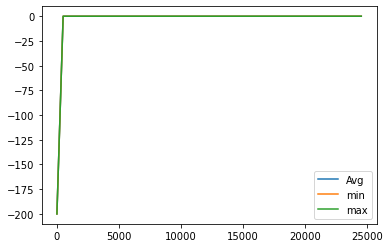

In [17]:
env.reset()
done = False

learning_rate = 0.1
discount = 0.95
episodes = 25000

show_every = 500

discrete_os_size = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / discrete_os_size


epsilon = 0.5
start_epsilon_decaying = 1
end_epsilon_decaying = episodes // 2 
epsilon_decay_value = epsilon / (end_epsilon_decaying - start_epsilon_decaying)


ep_rewards = []
aggr_ep_rewards = {'ep' : [] ,'avg' : [] , 'min' : [] , 'max' : []}

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int32))


for episode in range(episodes):
    episode_reward = 0 
    if episode % show_every == 0:
        render = True
        print(episode)
    else:
        render = False
    discrete_state = get_discrete_state(env.reset())
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_feature_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount * max_feature_q)
            q_table[discrete_state+(action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print("We made it on episode: ", episode)
            q_table[discrete_state + (action, )] = 0 

        discerete_state = new_discrete_state
    
    if end_epsilon_decaying >= episode >= start_epsilon_decaying:
        epsilon -= epsilon_decay_value
    
    
    ep_rewards.append(episode_reward)
    if not episode % show_every:
        average_reward = sum(ep_rewards[-show_every:])/len(ep_rewards[-show_every:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-show_every:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-show_every:]))
        print('Episode: ',episode ,'Avg: ',average_reward , 'Min: ' ,min(ep_rewards[-show_every:]), 'Max: ',max(ep_rewards[-show_every:]))
    
    
env.close() 

plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['avg'], label='Avg')
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['min'], label='min')
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['max'], label='max')
plt.legend(loc=4)
plt.show()

    Due to high randomness, the car reached the goal once, and it failed to reach the goal every time. I am not sure if that's because of learning rate, discount, or number of episode is not enough for the model to learn. 

#### References 

https://www.youtube.com/watch?v=yMk_XtIEzH8&list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7

https://www.youtube.com/watch?v=Gq1Azv_B4-4

https://www.youtube.com/watch?v=CBTbifYx6a8